Leung Wai Liu <br>
JPMorgan AI Research <br>
August 8, 2022 <br>
Twitter Relabelling Val Data Processing 

In [1]:
from reading_datasets import read_ud_dataset, reading_tb_ner
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
pos_train = read_ud_dataset(dataset = 'tb', location = '../Datasets/POSTagging/Tweebank/', split = 'train')
pos_val = read_ud_dataset(dataset = 'tb', location = '../Datasets/POSTagging/Tweebank/', split = 'dev')
pos_test = read_ud_dataset(dataset = 'tb', location = '../Datasets/POSTagging/Tweebank/', split = 'test')
ner_train = reading_tb_ner(location = '../Datasets/NER/Tweebank/', split = 'train')
ner_val = reading_tb_ner(location = '../Datasets/NER/Tweebank/', split = 'dev')
ner_test = reading_tb_ner(location = '../Datasets/NER/Tweebank/', split = 'test')

#Getting all the tweets for validation dataset
combined_dataset_val_ner = []
combined_dataset_val_pos = []
for i, (tweet, pos_labels) in enumerate(pos_val):
    tweet = [token.lower() for token in tweet]
    query = ' '.join(tweet)

    found = False
    for ner_tweet, ner_labels in ner_val:
        ner_tweet = [token.lower() for token in ner_tweet]
        check = ' '.join(ner_tweet)
        if query == check:
            found = True
            break

    if found and tweet == ner_tweet:
        combined_dataset_val_ner.append(ner_labels)
        combined_dataset_val_pos.append(pos_labels)


In [3]:
combined_ner_labels_val = []
combined_ner_labels_val_no_o = []
combined_ner_labels_val_no_bio_and_o = []

combined_pos_labels_val = []

for ind_list in combined_dataset_val_ner:
    for item in ind_list:
        combined_ner_labels_val.append(item)
        if item != 'O':
            combined_ner_labels_val_no_o.append(item)
            new_item = item[2:]
            combined_ner_labels_val_no_bio_and_o.append(new_item)

for ind_list in combined_dataset_val_pos:
    for item in ind_list:
        combined_pos_labels_val.append(item)

In [4]:
counter_val_ner_all = Counter(combined_ner_labels_val)
print(counter_val_ner_all)

Counter({'O': 11060, 'B-PER': 144, 'B-ORG': 114, 'I-MISC': 104, 'B-MISC': 97, 'I-PER': 73, 'B-LOC': 70, 'I-ORG': 50, 'I-LOC': 23})


<BarContainer object of 9 artists>

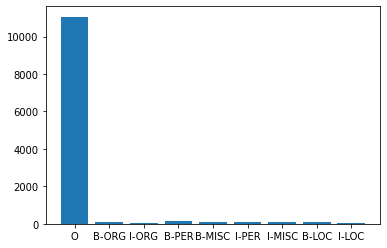

In [5]:
plt.bar(counter_val_ner_all.keys(), counter_val_ner_all.values())

In [6]:
counter_val_ner_no_o = Counter(combined_ner_labels_val_no_o)
print(counter_val_ner_no_o)

Counter({'B-PER': 144, 'B-ORG': 114, 'I-MISC': 104, 'B-MISC': 97, 'I-PER': 73, 'B-LOC': 70, 'I-ORG': 50, 'I-LOC': 23})


<BarContainer object of 8 artists>

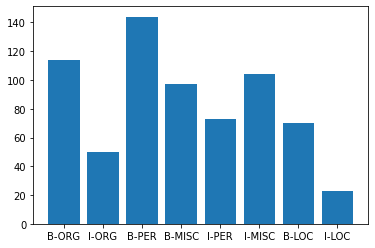

In [7]:
plt.bar(counter_val_ner_no_o.keys(), counter_val_ner_no_o.values())

In [8]:
counter_val_ner_no_bio_and_o = Counter(combined_ner_labels_val_no_bio_and_o)
print(counter_val_ner_no_bio_and_o)

Counter({'PER': 217, 'MISC': 201, 'ORG': 164, 'LOC': 93})


<BarContainer object of 4 artists>

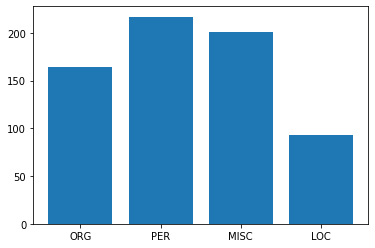

In [9]:
plt.bar(counter_val_ner_no_bio_and_o.keys(), counter_val_ner_no_bio_and_o.values())

In [10]:
counter_val_pos_all = Counter(combined_pos_labels_val)
print(counter_val_pos_all)

Counter({'NOUN': 1603, 'PUNCT': 1578, 'X': 1182, 'VERB': 1168, 'PRON': 1094, 'PROPN': 976, 'ADP': 743, 'ADJ': 608, 'AUX': 585, 'DET': 541, 'ADV': 535, 'PART': 259, 'NUM': 208, 'CCONJ': 206, 'SYM': 180, 'INTJ': 166, 'SCONJ': 103})


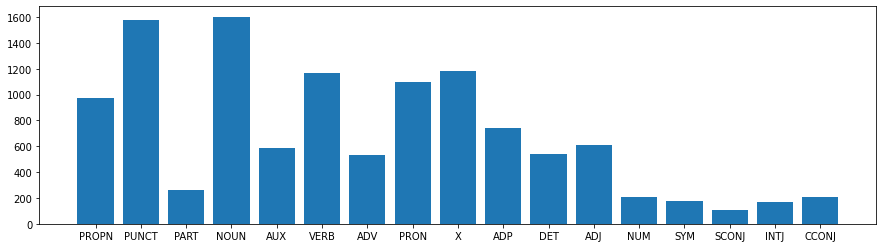

In [11]:
f = plt.figure()
f.set_figwidth(15)
plt.bar(counter_val_pos_all.keys(), counter_val_pos_all.values())
plt.show()
